In [1]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import hvplot.pandas
import panel as pn
import holoviews as hv
import yfinance as yf

%matplotlib inline

In [51]:
# Use yahoo finance data to test the code
symbol = ['MSFT', 'AAPL', '^GSPC']
start_date = '2018-04-01'
end_date = '2023-03-31'
ticker_data = yf.download(symbol, start=start_date, end=end_date)

ticker_data.head()

[*********************100%***********************]  3 of 3 completed


Adj Close                              Close             \
                 AAPL       MSFT        ^GSPC       AAPL       MSFT   
Date                                                                  
2018-04-02  39.724895  83.542931  2581.879883  41.669998  88.519997   
2018-04-03  40.132439  84.666016  2614.449951  42.097500  89.709999   
2018-04-04  40.899860  87.138718  2644.689941  42.902500  92.330002   
2018-04-05  41.183472  87.185913  2662.840088  43.200001  92.379997   
2018-04-06  40.130043  85.156776  2604.469971  42.095001  90.230003   

                              High                                Low  \
                  ^GSPC       AAPL       MSFT        ^GSPC       AAPL   
Date                                                                    
2018-04-02  2581.879883  42.235001  90.879997  2638.300049  41.117500   
2018-04-03  2614.449951  42.187500  90.050003  2619.139893  41.220001   
2018-04-04  2644.689941  43.002499  92.760002  2649.860107  41.192501   
2018-04-05  2662.840088  43.557499  93.070000  2672.080078  43.020000   
2018-04-06  2604.469971  43.119999  92.459999  2656.879883  42.049999   

                                         Open                          \
                 MSFT        ^GSPC       AAPL       MSFT        ^GSPC   
Date                                                                    
2018-04-02  87.510002  2553.800049  41.660000  90.470001  2633.449951   
2018-04-03  87.889999  2575.489990  41.910000  89.580002  2592.169922   
2018-04-04  87.730003  2573.610107  41.220001  87.849998  2584.040039   
2018-04-05  91.400002  2649.580078  43.145000  92.440002  2657.360107   
2018-04-06  89.480003  2586.270020  42.742500  91.489998  2645.820068   

               Volume                        
                 AAPL      MSFT       ^GSPC  
Date                                         
2018-04-02  150347200  48515400  3635780000  
2018-04-03  121112000  37213800  3395840000  
2018-04-04  138422000  35560000  3369230000  
2018-04-05  107732800  29771900  3230430000  
2018-04-06  140021200  38026000  3312390000

In [52]:
print(ticker_data)

             Adj Close                                Close              \
                  AAPL        MSFT        ^GSPC        AAPL        MSFT   
Date                                                                      
2018-04-02   39.724895   83.542931  2581.879883   41.669998   88.519997   
2018-04-03   40.132439   84.666016  2614.449951   42.097500   89.709999   
2018-04-04   40.899860   87.138718  2644.689941   42.902500   92.330002   
2018-04-05   41.183472   87.185913  2662.840088   43.200001   92.379997   
2018-04-06   40.130043   85.156776  2604.469971   42.095001   90.230003   
...                ...         ...          ...         ...         ...   
2023-03-24  160.250000  280.570007  3970.989990  160.250000  280.570007   
2023-03-27  158.279999  276.380005  3977.530029  158.279999  276.380005   
2023-03-28  157.649994  275.230011  3971.270020  157.649994  275.230011   
2023-03-29  160.770004  280.510010  4027.810059  160.770004  280.510010   
2023-03-30  162.360001  2

In [53]:
ticker_data = ticker_data.drop(columns = ["Open","High","Low","Adj Close","Volume"])

print(ticker_data)
# ticker_data = ticker_data.reset_index()

                 Close                         
                  AAPL        MSFT        ^GSPC
Date                                           
2018-04-02   41.669998   88.519997  2581.879883
2018-04-03   42.097500   89.709999  2614.449951
2018-04-04   42.902500   92.330002  2644.689941
2018-04-05   43.200001   92.379997  2662.840088
2018-04-06   42.095001   90.230003  2604.469971
...                ...         ...          ...
2023-03-24  160.250000  280.570007  3970.989990
2023-03-27  158.279999  276.380005  3977.530029
2023-03-28  157.649994  275.230011  3971.270020
2023-03-29  160.770004  280.510010  4027.810059
2023-03-30  162.360001  284.049988  4050.830078

[1259 rows x 3 columns]


In [ ]:
# ticker_data = ticker_data.droplevel(0, axis=1)

# ticker_data.head()

In [ ]:
# ticker_data = ticker_data.rename(columns={"":"Date", "^GSPC":"SP500"})

# ticker_data.head()

In [55]:
# Calculate the daily return using the 'pct_change()' function

daily_returns = ticker_data.pct_change()

print(daily_returns)

               Close                    
                AAPL      MSFT     ^GSPC
Date                                    
2018-04-02       NaN       NaN       NaN
2018-04-03  0.010259  0.013443  0.012615
2018-04-04  0.019122  0.029205  0.011566
2018-04-05  0.006934  0.000541  0.006863
2018-04-06 -0.025579 -0.023273 -0.021920
...              ...       ...       ...
2023-03-24  0.008306  0.010480  0.005640
2023-03-27 -0.012293 -0.014934  0.001647
2023-03-28 -0.003980 -0.004161 -0.001574
2023-03-29  0.019791  0.019184  0.014237
2023-03-30  0.009890  0.012620  0.005715

[1259 rows x 3 columns]


<AxesSubplot:title={'center':'Cumulative Returns of Symbols over the Last 5 Year'}, xlabel='Date'>

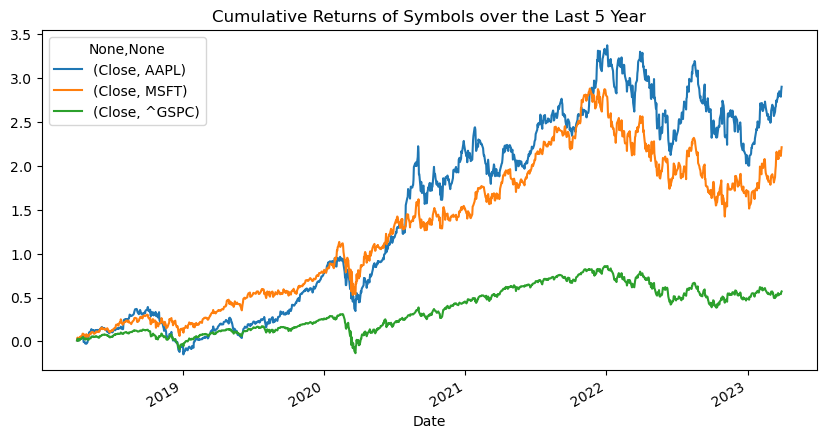

In [56]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + daily_returns).cumprod() - 1

cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of Symbols over the Last 5 Year")

In [7]:
# Calculate covariance of all daily returns of Symbols vs. SP500
covariance_aapl= daily_returns['AAPL'].cov(daily_returns['SP500'])
covariance_msft= daily_returns['MSFT'].cov(daily_returns['SP500'])

# Calculate variance of the S&P 500
variance = daily_returns['SP500'].var()

# Calculate beta of all daily returns of MSFT
beta_aapl = round(covariance_aapl / variance, 2)
beta_msft = round(covariance_msft / variance, 2)

print(f"AAPL's Beta is: {beta_aapl}")
print(f"MSFT's Beta is: {beta_msft}")

AAPL's Beta is: 1.23
MSFT's Beta is: 1.21


In [8]:
# Calculate Sharpe Ratio
sharpe_ratios_aapl = round((daily_returns['AAPL'].mean()) / (daily_returns['AAPL'].std() * np.sqrt(252)),4)
sharpe_ratios_msft = round((daily_returns['MSFT'].mean()) / (daily_returns['MSFT'].std() * np.sqrt(252)),4)
sharpe_ratios_sp500 = round((daily_returns['SP500'].mean()) / (daily_returns['SP500'].std() * np.sqrt(252)),4)
print(f"AAPL's Sharpe Ratio is : {sharpe_ratios_aapl}")
print(f"MSFT's Sharpe Ratio is : {sharpe_ratios_msft}")
print(f"SP500's Sharpe Ratio is : {sharpe_ratios_sp500}")

AAPL's Sharpe Ratio is : 0.0039
MSFT's Sharpe Ratio is : 0.0036
SP500's Sharpe Ratio is : 0.0021


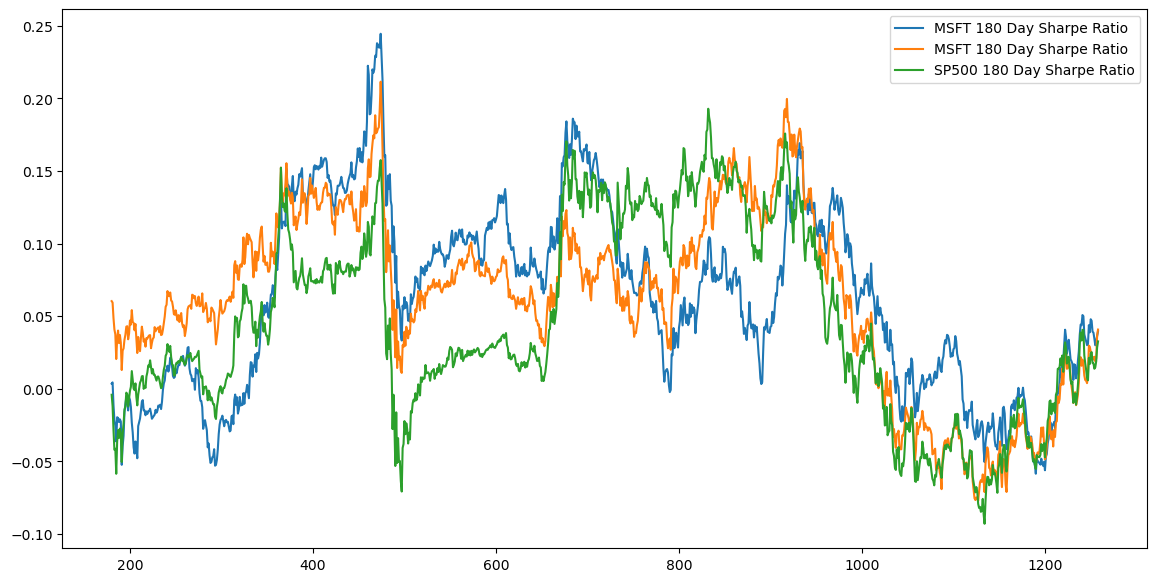

In [9]:
# Plot a rolling 180-day Sharpe Ratio of MSFT and SP500 closing prices
rolling_SPR_aapl = daily_returns['AAPL'].rolling(window=180).mean() / daily_returns['AAPL'].rolling(window=180).std()
rolling_SPR_msft = daily_returns['MSFT'].rolling(window=180).mean() / daily_returns['MSFT'].rolling(window=180).std()
rolling_SPR_sp500 = daily_returns['SP500'].rolling(window=180).mean() / daily_returns['SP500'].rolling(window=180).std()
ax = rolling_SPR_aapl.plot(figsize=(14,7))
rolling_SPR_msft.plot(ax=ax)
rolling_SPR_sp500.plot(ax=ax)

# Set the legend of the figure
ax.legend(["MSFT 180 Day Sharpe Ratio", "MSFT 180 Day Sharpe Ratio", "SP500 180 Day Sharpe Ratio"])

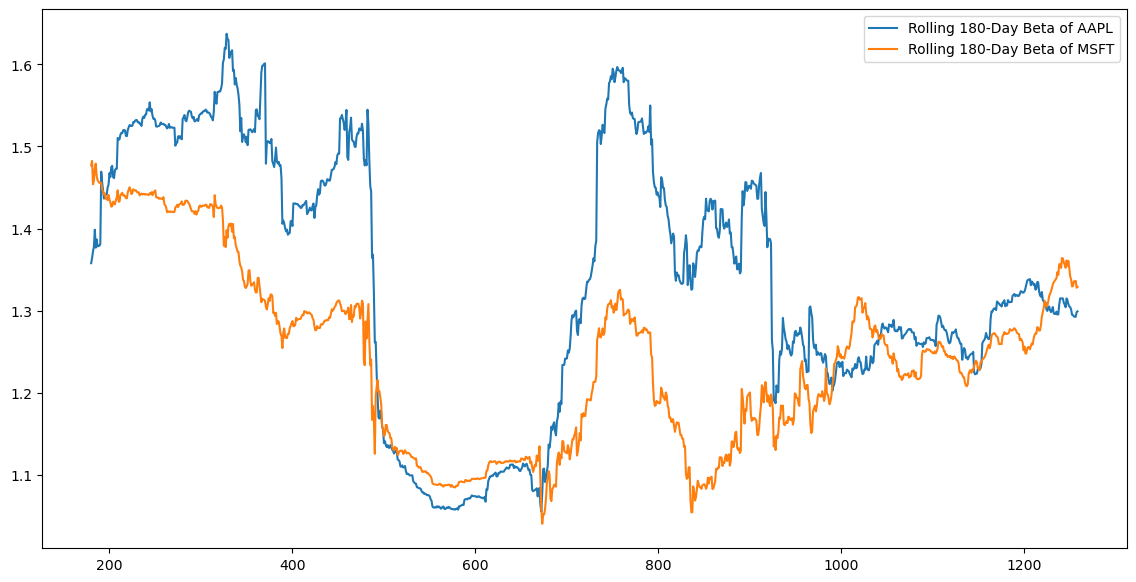

In [10]:
# Calculate 180-day rolling beta of MSFT and plot the data
rolling_covariance_aapl = daily_returns['AAPL'].rolling(window=180).cov(daily_returns['SP500'])
rolling_covariance_msft = daily_returns['MSFT'].rolling(window=180).cov(daily_returns['SP500'])
rolling_variance = daily_returns['SP500'].rolling(window=180).var()
rolling_beta_aapl= rolling_covariance_aapl / rolling_variance
rolling_beta_msft= rolling_covariance_msft / rolling_variance
ax = rolling_beta_aapl.plot(figsize=(14,7))
rolling_beta_msft.plot(ax=ax)

ax.legend(['Rolling 180-Day Beta of AAPL','Rolling 180-Day Beta of MSFT'])

In [11]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
import yfinance as yf
from MCForecastTools import MCSimulation

symbol = 'MSFT'
start_date = '2018-04-01'
end_date = '2023-03-31'
ticker_data = yf.download(symbol, start=start_date, end=end_date)
ticker_data = pd.concat([ticker_data], axis=1, keys=["MSFT"])
ticker_data = ticker_data.rename(columns={"Close":"close"})
ticker_data

[*********************100%***********************]  1 of 1 completed


MSFT                                                  \
                  Open        High         Low       close   Adj Close   
Date                                                                     
2018-04-02   90.470001   90.879997   87.510002   88.519997   83.542946   
2018-04-03   89.580002   90.050003   87.889999   89.709999   84.666031   
2018-04-04   87.849998   92.760002   87.730003   92.330002   87.138710   
2018-04-05   92.440002   93.070000   91.400002   92.379997   87.185898   
2018-04-06   91.489998   92.459999   89.480003   90.230003   85.156815   
...                ...         ...         ...         ...         ...   
2023-03-24  277.239990  280.630005  275.279999  280.570007  280.570007   
2023-03-27  280.500000  281.459991  275.519989  276.380005  276.380005   
2023-03-28  275.790009  276.140015  272.049988  275.230011  275.230011   
2023-03-29  278.959991  281.140015  278.410004  280.510010  280.510010   
2023-03-30  284.230011  284.459991  281.480011  284.049988  284.049988   

                      
              Volume  
Date                  
2018-04-02  48515400  
2018-04-03  37213800  
2018-04-04  35560000  
2018-04-05  29771900  
2018-04-06  38026000  
...              ...  
2023-03-24  28172000  
2023-03-27  26840200  
2023-03-28  21878600  
2023-03-29  25087000  
2023-03-30  25053400  

[1259 rows x 6 columns]

In [12]:
# Configuring a Monte Carlo simulation to forecast three years cumulative returns

from MCForecastTools import MCSimulation

num_sims = 500

MC_ticker = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*3
)
# Printing the simulation input data
MC_ticker.portfolio_data.head()

MSFT                                                        \
                 Open       High        Low      close  Adj Close    Volume   
Date                                                                          
2018-04-02  90.470001  90.879997  87.510002  88.519997  83.542946  48515400   
2018-04-03  89.580002  90.050003  87.889999  89.709999  84.666031  37213800   
2018-04-04  87.849998  92.760002  87.730003  92.330002  87.138710  35560000   
2018-04-05  92.440002  93.070000  91.400002  92.379997  87.185898  29771900   
2018-04-06  91.489998  92.459999  89.480003  90.230003  85.156815  38026000   

                         
           daily_return  
Date                     
2018-04-02          NaN  
2018-04-03     0.013443  
2018-04-04     0.029205  
2018-04-05     0.000541  
2018-04-06    -0.023273

In [13]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_ticker.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/vickygao/Desktop/project1/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.993947  1.025398  1.009044  0.993339  0.992001  1.010124  0.975915   
2    1.006396  1.002386  1.000473  0.982261  1.009926  1.038480  0.979082   
3    1.005185  1.004193  0.994664  0.948703  0.989453  1.021865  0.970510   
4    1.020405  0.991019  1.016668  0.977042  0.996130  1.052852  0.985669   
..        ...       ...       ...       ...       ...       ...       ...   
752  5.989736  4.511435  1.175795  1.636095  3.292789  7.504871  2.349349   
753  6.107417  4.583125  1.162018  1.696069  3.375567  7.366502  2.255027   
754  5.934017  4.716322  1.145158  1.736693  3.284393  7.524670  2.189680   
755  6.125852  4.634155  1.144754  1.708783  3.441175  7.356926  2.182187   
756  6.109883  4.555218  1.201419  1.798828  3.444451  7.587125  2.130922   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.014698  1.013450  1.044347  ...  1.003806  1.002279  0.988032   
2    1.010411  1.035993  1.062744  ...  1.033046  1.004027  1.017460   
3    1.033203  1.012463  1.051257  ...  1.038443  1.000832  1.041177   
4    0.994359  0.999910  1.037775  ...  1.041315  1.028553  1.046382   
..        ...       ...       ...  ...       ...       ...       ...   
752  3.417399  0.810255  1.915285  ...  2.762086  1.974786  2.366234   
753  3.394201  0.839222  1.934901  ...  2.705518  1.926318  2.335659   
754  3.360316  0.841812  1.840201  ...  2.691032  1.904956  2.336840   
755  3.325353  0.845196  1.824806  ...  2.717985  1.916961  2.390808   
756  3.331598  0.809720  1.769899  ...  2.693724  1.950189  2.441406   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.991034  0.979716  1.044725  1.026971  1.002242  0.979925  1.018212  
2    0.991039  0.998719  1.043702  1.020171  1.014720  0.969807  0.999217  
3    0.995627  0.974944  1.057473  1.031738  1.036435  0.949244  0.965920  
4    0.970875  1.000778  1.028742  1.027386  1.051036  0.943211  0.951095  
..        ...       ...       ...       ...       ...       ...       ...  
752  3.674563  2.029804  1.529197  2.377960  7.651105  2.183862  5.654530  
753  3.730450  1.985417  1.529258  2.426401  7.737861  2.162842  5.642567  
754  3.622279  2.068185  1.503426  2.367219  7.723331  2.226003  5.578762  
755  3.584249  2.048616  1.463952  2.381125  7.656403  2.177550  5.601920  
756  3.547148  2.021775  1.493842  2.351791  7.410315  2.163893  5.537920  

[757 rows x 500 columns]

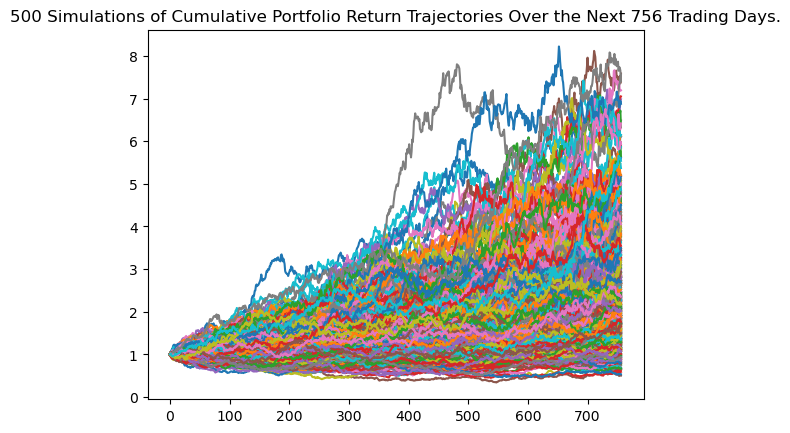

In [14]:
# Plot simulation outcomes
line_plot = MC_ticker.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_ticker_sim_plot.png", bbox_inches="tight")

In [15]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_ticker.simulated_return.mean(axis=1)),
    "median": list(MC_ticker.simulated_return.median(axis=1)),
    "min": list(MC_ticker.simulated_return.min(axis=1)),
    "max": list(MC_ticker.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.001975  1.002001  0.948561  1.057362
2  1.006303  1.006425  0.923545  1.084821
3  1.006040  1.005658  0.908839  1.102174
4  1.008282  1.009156  0.891278  1.134113

<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of MSFT Stock Over the Next Three Years'}>

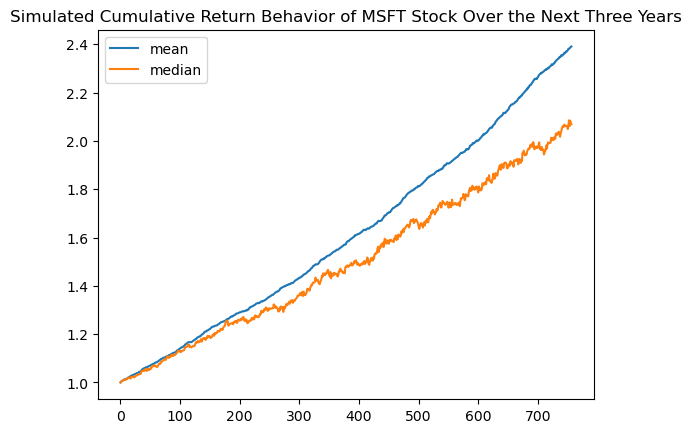

In [16]:
# Use the `plot` function to visually analyze TSLA cumulative returns over the next three hears
# Plot both mean and median forecasted cumulative return
df_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of MSFT Stock Over the Next Three Years")

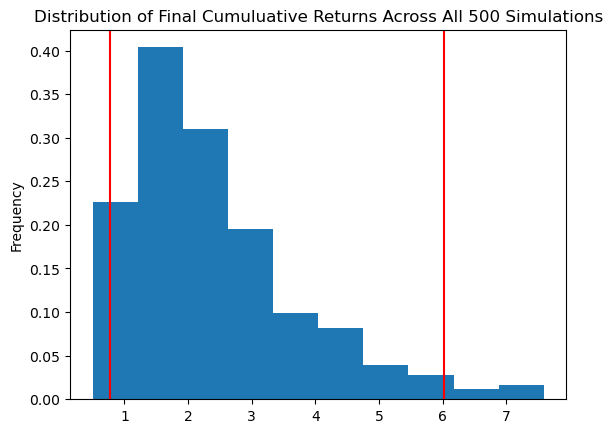

In [17]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ticker.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_ticker_dist_plot.png',bbox_inches='tight')

In [18]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ticker.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.391058
std               1.336658
min               0.503095
25%               1.415291
50%               2.069504
75%               2.906607
max               7.587125
95% CI Lower      0.772657
95% CI Upper      6.024799
Name: 756, dtype: float64


In [19]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the stock"
      f" over the next 3 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the stock over the next 3 years will end within in the range of $7726.57 and $60247.99
